# Project Overview 

Moosic is a startup that offers curated playlists crafted by music experts and specialists, capturing both old and new trends. Users can subscribe to their website and access these playlists on their preferred music apps like Spotify, Apple Music, or Youtube Music. The playlists are known for their personal touch, encompassing specific moods or styles.

Due to the rapid scaling of the business, Moosic wants to introduce automation into playlist creation using Data Science. They plan to use a dataset collected from the Spotify API, containing audio features (tempo, energy, danceability, etc.) of thousands of songs. The goal is to employ a basic clustering algorithm like K-Means to group the songs into clusters, effectively creating playlists.

Some team members express skepticism about whether audio features alone can capture the true "mood" of a song, believing that only human judgment can do so. On the other hand, others are optimistic that Data Science can bring unique connections between songs that may seem unexpected but make sense in the context of playlists.

For the initial week, the company expects a prototype of the playlist creation process using the given dataset and K-Means. The playlists do not have to be perfect at this stage, as it marks the beginning of a comprehensive process. Two key assessments will be made: 

1. Can Spotify's audio features effectively identify "similar songs" based on humanly detectable criteria? This involves determining if the audio features are reliable in identifying similarities between songs, such as two rock ballads, two operas, or two drum & bass songs.

2. Is K-Means an appropriate method for creating playlists? The team will evaluate if K-Means is suitable moving forward or if they should explore other playlist creation algorithms.

Overall, the company seeks to strike a balance between automation and the human touch to enhance their curated playlists and cater to the diverse preferences of their users.

# Data Importation & Dependences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px
from itertools import permutations
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import pairwise_distances


/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/xarray/core/npcompat.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) >= "1.20.0":
/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/xarray/

In [5]:
# 1k songs dataset

# Specify the file path
file_path = 'df_audio_features_1000.csv'

# Load the profile data from the CSV file
df = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows of the profile data
df.head()

name           artist  \
0                                  All Shook Up    Elvis Presley   
1  I've Got You Under My Skin - Remastered 1998    Frank Sinatra   
2                       Smoke Gets In Your Eyes     The Platters   
3                       What'd I Say, Pt. 1 & 2      Ray Charles   
4                    Dream A Little Dream Of Me  Ella Fitzgerald   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.624   0.468   10   -12.162     1       0.1320         0.881   
1         0.585   0.247    1   -12.612     1       0.0400         0.452   
2         0.290   0.227    3   -13.060     1       0.0311         0.944   
3         0.540   0.681    4    -5.440     1       0.0508         0.808   
4         0.455   0.167    0   -13.613     1       0.0739         0.918   

   instrumentalness  liveness  valence    tempo  type  duration_ms  \
0          0.000006     0.144    0.952   74.139   NaN       117080   
1          0.000009     0.107    0.591  127.150   NaN       223760   
2          0.000079     0.617    0.224  114.278   NaN       157293   
3          0.000000     0.162    0.794   88.385   NaN       307053   
4          0.000000     0.173    0.404   76.118   NaN       185067   

   time_signature                      id  \
0               4  5ueyLj6e6oVaTY0KQ6yLaA   
1               4  3aEJMh1cXKEjgh52claxQp   
2               4  307XEC1IUwUs9ojlEFwH7f   
3               4  5yQ9iMZXGcr5rlO4hoLsP4   
4               4  3vFVS2WYHDG4KkWCNecvpn   

                                                html  
0  https://open.spotify.com/track/5ueyLj6e6oVaTY0...  
1  https://open.spotify.com/track/3aEJMh1cXKEjgh5...  
2  https://open.spotify.com/track/307XEC1IUwUs9oj...  
3  https://open.spotify.com/track/5yQ9iMZXGcr5rlO...  
4  https://open.spotify.com/track/3vFVS2WYHDG4KkW...

In [6]:
# 5k songs dataset

# Specify the file path
file_path = 'df_audio_features_5000.csv'

# Load the profile data from the CSV file
df_5k = pd.read_csv(file_path, encoding='utf-8')

# Display the first few rows of the profile data
df_5k.head()

name                                                                                                                                                                               \
0  Se Eu Quiser Falar Com Deus                   ...                                                                                                                                  
1  Saudade De Bahia                              ...                                                                                                                                  
2  Canta Canta, Minha Gente                      ...                                                                                                                                  
3  Mulher Eu Sei                                 ...                                                                                                                                  
4  Rosa Morena                                   ...                                                                                                                                  

   artist                                            danceability   energy     \
0  Gilberto Gil                                              0.658     0.2590   
1  Antônio Carlos Jobim                                      0.742     0.3990   
2  Martinho Da Vila                                          0.851     0.7300   
3  Chico César                                               0.705     0.0502   
4  Kurt Elling                                               0.651     0.1190   

   key   loudness   mode   speechiness   acousticness   instrumentalness   \
0    11    -13.141      0        0.0705          0.694           0.000059   
1     2    -12.646      1        0.0346          0.217           0.000002   
2     2    -11.048      1        0.3470          0.453           0.000063   
3     4    -18.115      1        0.0471          0.879           0.000041   
4     6    -19.807      1        0.0380          0.916           0.000343   

   liveness   valence   tempo     type   duration_ms   time_signature   \
0      0.975     0.306   110.376               256213                4   
1      0.107     0.693   125.039               191867                4   
2      0.124     0.905    93.698               152267                4   
3      0.386     0.524   106.802               186227                4   
4      0.104     0.402   120.941               273680                4   

   id                                                                    html  
0  1n7JnwviZ7zf0LR1tcGFq7   https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1  5QGM1U0eCYrQuwSJwTm5Zq   https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2  0NLIFSZxPzQhCwnkn5PJYs   https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3  3mXqOdlLE1k67WsAxryPFs   https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4  7bSzjzjTkWT2CkIPPdp0eA   https://open.spotify.com/track/7bSzjzjTkWT2CkI...

# Clustering First Iteration (1k songs dataset)

In [7]:

# Keep a copy of the original DataFrame to preserve the data
df_audio_features = df.copy()

# Set a multi-index with 'name' and 'artist' columns
df_audio_features.set_index(['name', 'artist'], inplace=True)

# Drop unnecessary columns in place
columns_to_drop = ['id', 'html', 'type', 'duration_ms', 'time_signature']
df_audio_features.drop(columns=columns_to_drop, inplace=True)


/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


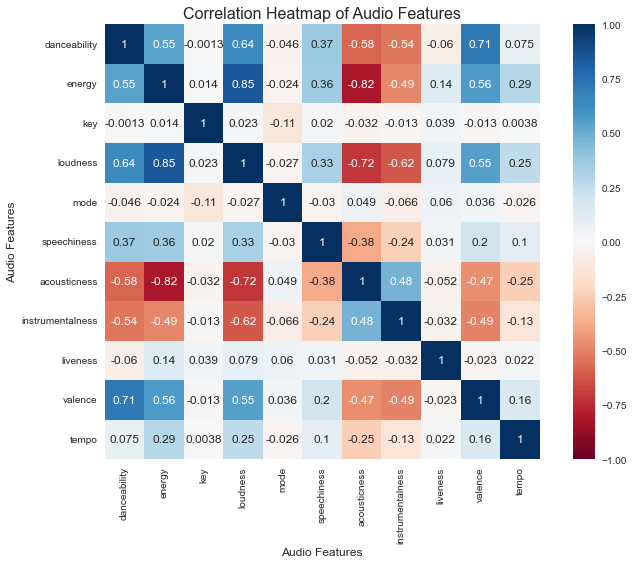

In [8]:
# Set the figure size and create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_audio_features.corr(), square=True, vmin=-1, vmax=1, annot=True, cmap='RdBu')

# Add title and improve axis labels
plt.title("Correlation Heatmap of Audio Features", fontsize=16)
plt.xlabel("Audio Features", fontsize=12)
plt.ylabel("Audio Features", fontsize=12)

# Display the plot
plt.show()


There is no correlation among the various metrics.

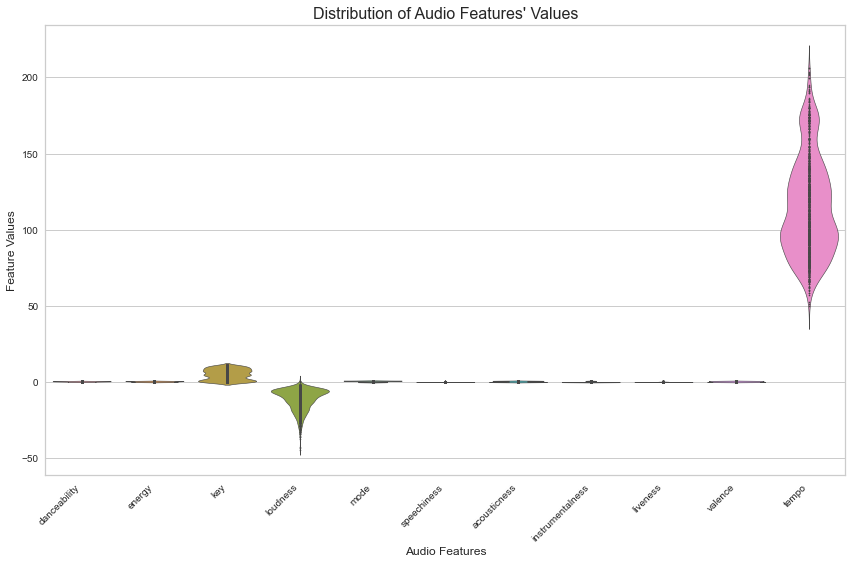

In [9]:

# Create a violin plot to visualize the distribution of feature values
plt.figure(figsize=(12, 8))
df_melted = df_audio_features.melt(var_name='Feature', value_name='Value')
ax = sns.violinplot(x="Feature", y="Value", data=df_melted, linewidth=0.6, inner='point', scale='width')

# Improve the plot's appearance
plt.title("Distribution of Audio Features' Values", fontsize=16)
plt.xlabel("Audio Features", fontsize=12)
plt.ylabel("Feature Values", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


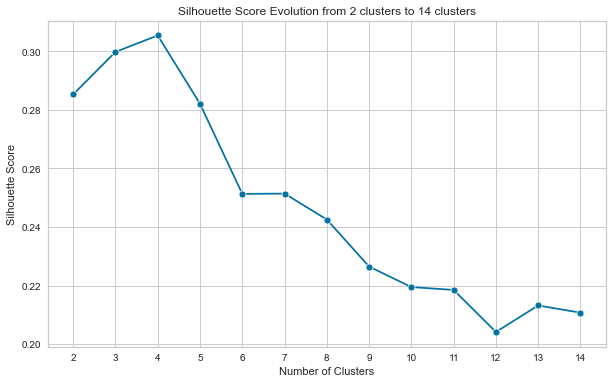

In [10]:
# Finding the optimal number of clusters using the silhouette method.
max_clusters = 15
silhouette_scores = []
audio_norm = MinMaxScaler().fit_transform(df_audio_features)

for num_clusters in range(2, max_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(audio_norm)
    silhouette_scores.append(silhouette_score(audio_norm, cluster_labels))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.title(f'Silhouette Score Evolution from 2 clusters to {max_clusters-1} clusters')
sns.lineplot(x=range(2, max_clusters), y=silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, max_clusters))
plt.grid(True)
plt.show()


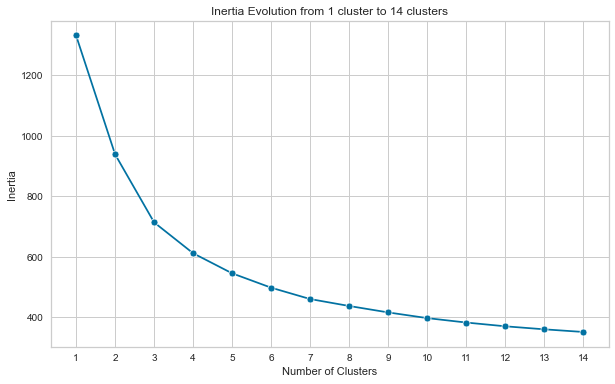

In [11]:
# Finding the optimal number of clusters using the inertia method.
max_clusters = 15
inertia_scores = []
audio_norm = MinMaxScaler().fit_transform(df_audio_features)

for num_clusters in range(1, max_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(audio_norm)
    inertia_scores.append(kmeans.inertia_)

# Plotting the inertia scores
plt.figure(figsize=(10, 6))
plt.title(f'Inertia Evolution from 1 cluster to {max_clusters-1} clusters')
sns.lineplot(x=range(1, max_clusters), y=inertia_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, max_clusters))
plt.grid(True)
plt.show()


                                          features     score  elbow
22      [acousticness, instrumentalness, loudness]  0.641879      4
44      [acousticness, instrumentalness, liveness]  0.604042      4
0        [instrumentalness, liveness, speechiness]  0.581092      4
17   [acousticness, instrumentalness, speechiness]  0.579037      5
19  [acousticness, danceability, instrumentalness]  0.563681      4
21            [energy, instrumentalness, loudness]  0.553994      4
6         [acousticness, energy, instrumentalness]  0.525802      5
12        [instrumentalness, speechiness, valence]  0.515234      4
32       [instrumentalness, loudness, speechiness]  0.498828      4
37           [instrumentalness, liveness, valence]  0.497318      4
26         [energy, instrumentalness, speechiness]  0.497024      4
28           [acousticness, loudness, speechiness]  0.491820      4
3            [acousticness, liveness, speechiness]  0.486239      5
39   [danceability, instrumentalness, speechines

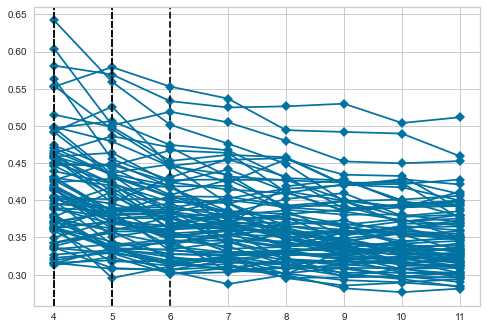

In [12]:

# Select the desired audio features
columns = ["energy", "speechiness", "acousticness", "instrumentalness", "loudness", "tempo", "danceability", "valence", "liveness"]
df_selected_features = df_audio_features[columns]

# Generate permutations of three audio features
perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)), perm))

# Initialize an empty list to store the results
results = []

# Perform K-Means clustering and calculate silhouette score and elbow value
for feature_combination in list(output):
    df_combination = df_selected_features[list(feature_combination)]
    x = df_combination.values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(4, 12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_

    if score > 0.4:
        idx = df_combination.columns
        feature_list = idx.tolist()
        result_dict = {
            "features": feature_list,
            "score": score,
            "elbow": value
        }
        results.append(result_dict)

# Create a DataFrame to display the results and order by the highest score
df_results = pd.DataFrame(results).sort_values(by="score", ascending=False)

print(df_results)


The permutation [acousticness, instrumentalness, loudness] achieved the highest score of 0.641879 with 4 elbow points (clusters).

In [13]:

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=15, max_iter=500)
df_combination['Cluster'] = kmeans.fit_predict(x_scaled)

# Rename the columns for clarity
df_combination.columns = ['acousticness', 'instrumentalness', 'loudness', 'Cluster']

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_combination, x='acousticness', y='instrumentalness', z='loudness', color='Cluster')

# Show the plot
fig.show()


/var/folders/8t/g44bkjt54b3_xtfwngn659900000gn/T/ipykernel_1922/2870705970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combination['Cluster'] = kmeans.fit_predict(x_scaled)


/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



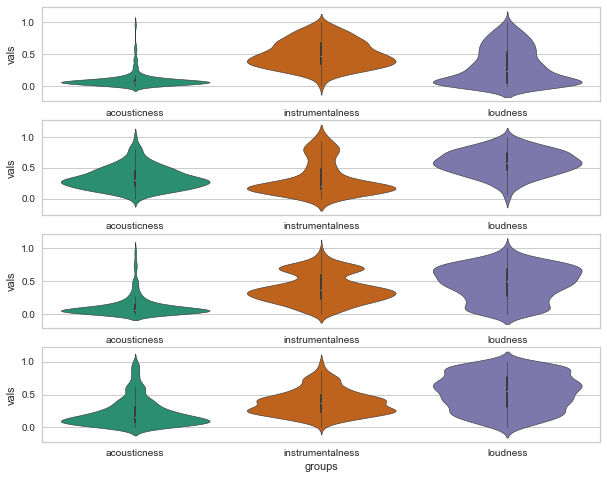

In [14]:

# Create a list of clusters based on kmeans labels
cluster_dfs = []
for cluster_num in range(4):
    cluster_df = df_combination[df_combination['Cluster'] == cluster_num].drop(['Cluster'], axis=1)
    x = cluster_df.values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    cluster_df = pd.DataFrame(x_scaled, columns=['acousticness', 'instrumentalness', 'loudness'])
    cluster_df = cluster_df.melt(var_name='groups', value_name='vals')
    cluster_dfs.append(cluster_df)

sns.set_palette('Dark2')

fig, axes = plt.subplots(4, 1, figsize=(10, 8))
for cluster_num, ax in enumerate(axes):
    ax = sns.violinplot(data=cluster_dfs[cluster_num], x="groups", y="vals", linewidth=0.6, inner='box', scale='width', ax=ax)

plt.show()


# Clustering Second Iteration (5k songs dataset)

In [15]:
def clean_dataframe_column_names(df):
    df.columns = [col.strip().lower().replace(" ", "") for col in df.columns]

clean_dataframe_column_names(df_5k)


In [16]:
df_5k = df_5k.set_index(['name', 'artist']).drop(columns=['id', 'html', 'type', 'duration_ms', 'time_signature'])

/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



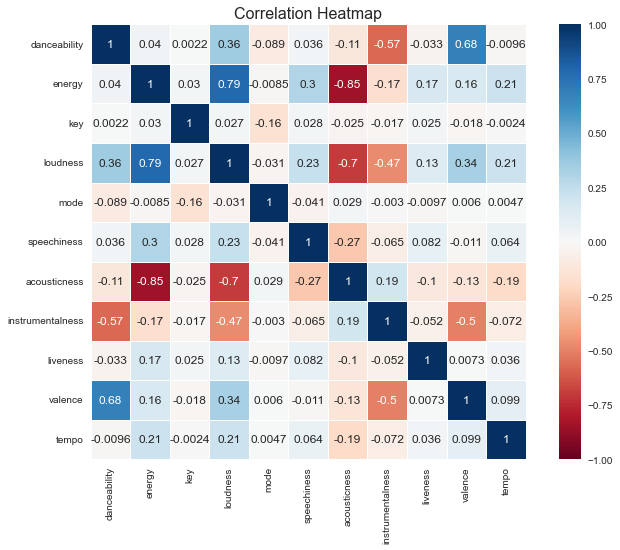

In [17]:
plt.figure(figsize=(12, 8))  # Set the figure size for better visualization
ax = sns.heatmap(df_5k.corr(), square=True, vmin=-1, vmax=1, annot=True, cmap='RdBu', center=0, linewidth=1)

# Add a title and adjust the font size
plt.title("Correlation Heatmap", fontsize=16)

# Display the plot
plt.show()


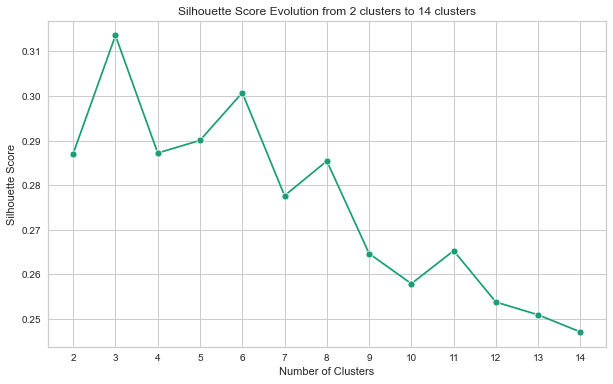

In [18]:
# Finding the optimal number of clusters using the silhouette method.
max_clusters = 15
silhouette_scores = []

# Scale the data using MinMaxScaler
df_5k_norm = MinMaxScaler().fit_transform(df_5k)

for num_clusters in range(2, max_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(df_5k_norm)
    silhouette_scores.append(silhouette_score(df_5k_norm, cluster_labels))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.title(f'Silhouette Score Evolution from 2 clusters to {max_clusters-1} clusters')
sns.lineplot(x=range(2, max_clusters), y=silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, max_clusters))
plt.grid(True)
plt.show()


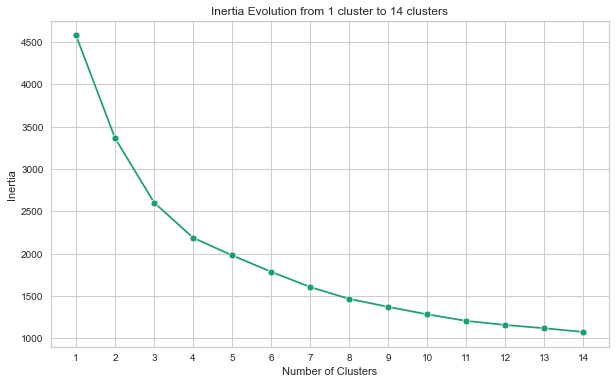

In [19]:
# Finding the optimal number of clusters using the inertia method.
max_clusters = 15
inertia_scores = []

# Scale the data using MinMaxScaler
df_5k_norm = MinMaxScaler().fit_transform(df_5k)

for num_clusters in range(1, max_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_5k_norm)
    inertia_scores.append(kmeans.inertia_)

# Plotting the inertia scores
plt.figure(figsize=(10, 6))
plt.title(f'Inertia Evolution from 1 cluster to {max_clusters-1} clusters')
sns.lineplot(x=range(1, max_clusters), y=inertia_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, max_clusters))
plt.grid(True)
plt.show()


                                          features     score  elbow
26      [acousticness, instrumentalness, loudness]  0.679638      4
19   [acousticness, instrumentalness, speechiness]  0.668345      4
38       [instrumentalness, loudness, speechiness]  0.612275      4
34         [acousticness, instrumentalness, tempo]  0.611032      4
48      [acousticness, instrumentalness, liveness]  0.609451      4
6         [acousticness, energy, instrumentalness]  0.608104      4
24            [energy, instrumentalness, loudness]  0.575073      4
21  [acousticness, danceability, instrumentalness]  0.565117      4
30         [energy, instrumentalness, speechiness]  0.550432      4
0        [instrumentalness, liveness, speechiness]  0.548035      4
4           [instrumentalness, liveness, loudness]  0.526912      4
31           [acousticness, loudness, speechiness]  0.511793      4
14          [acousticness, danceability, loudness]  0.507034      4
49       [acousticness, instrumentalness, valenc

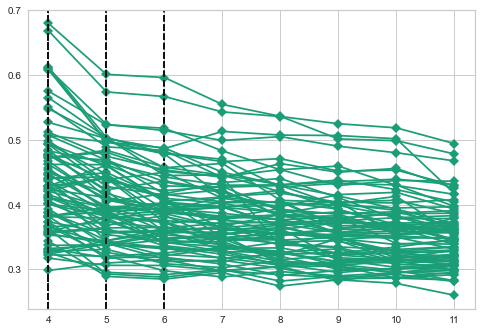

In [20]:

# Set DataFrame to df_5k
df = df_5k

# Select the desired audio features
columns = ["energy", "speechiness", "acousticness", "instrumentalness", "loudness", "tempo", "danceability", "valence", "liveness"]
df = df[columns]

perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)), perm))

# Initialize an empty list to store the results
results = []

for i in list(output):
    df1 = df[list(i)]
    x = df1.values
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(4, 12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_

    if score > 0.4:
        idx = df1.columns
        mylist = idx.tolist()
        result_dict = {
            "features": mylist,
            "score": score,
            "elbow": value
        }
        results.append(pd.DataFrame([result_dict]))  # Convert dict to DataFrame and append to list

# Concatenate the list of DataFrames into a single DataFrame
df3 = pd.concat(results, ignore_index=True)

# Sort the DataFrame by the highest score in descending order
df3 = df3.sort_values(by="score", ascending=False)

print(df3)


The combination of [acousticness, instrumentalness, loudness] achieved the highest score of 0.679638, with the elbow at 4 clusters.

/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



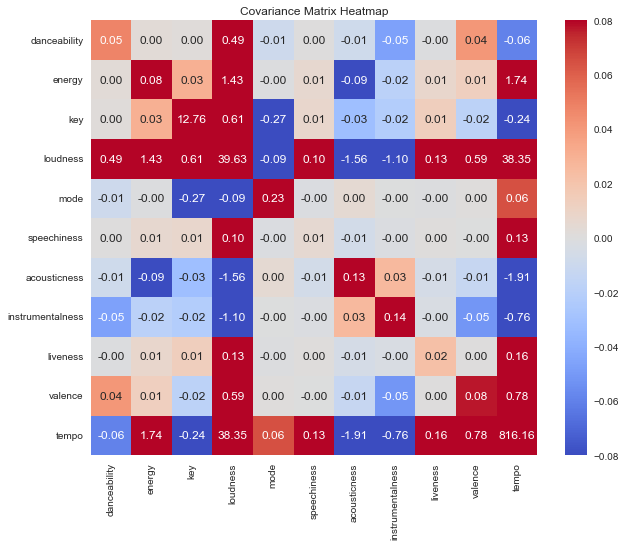

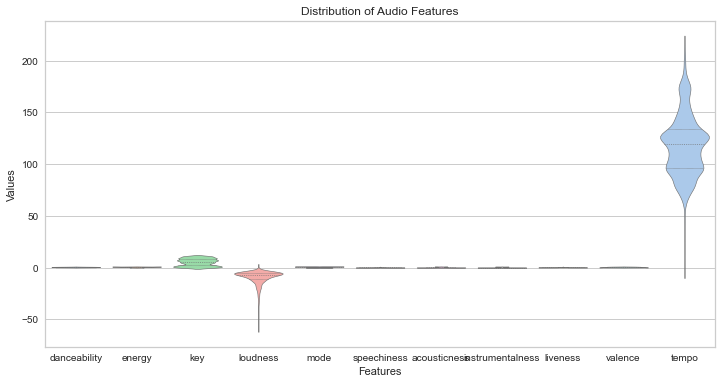

In [22]:
# Copy the DataFrame df_5k to df1 for processing
df1 = df_5k.copy()

# Calculate the covariance matrix and plot it as a heatmap
plt.figure(figsize=(10, 8))
ax1 = sns.heatmap(df1.cov(), vmin=-0.08, vmax=0.08, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Matrix Heatmap')
plt.show()

# Melt the DataFrame for violin plot
df1_melted = df1.melt(var_name='features', value_name='vals')

# Plot the violin plot to visualize feature distributions
plt.figure(figsize=(12, 6))
ax2 = sns.violinplot(x="features", y="vals", data=df1_melted, linewidth=0.6, inner='quart', scale='width', palette='pastel')
plt.title('Distribution of Audio Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


In [26]:


# Make a copy of df_5k for processing
df1 = df_5k.copy()

# Select the desired audio features
columns = ["energy", "speechiness", "acousticness", "instrumentalness", "loudness", "tempo", "danceability", "valence", "liveness"]
df1 = df1[columns]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=15, max_iter=500)
kmeans_labels = kmeans.fit_predict(x_scaled)

# Create a new DataFrame to store the clustered results
df_clustered = df1.copy()

# Add the K-Means labels to the DataFrame
df_clustered['cluster'] = kmeans_labels

# Rename the columns for clarity
df_clustered.columns = columns + ['cluster']

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_clustered, x='energy', y='speechiness', z='acousticness', color='cluster', size_max=10)

# Show the plot
fig.show()


/Users/beirutelabdi/opt/anaconda3/lib/python3.9/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

